In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

#**Reading Data**

In [ ]:
df = pd.read_csv('/content/Data_Train.csv')

#**Data Exploration**

In [ ]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [ ]:
df.shape

(10683, 11)

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df.duplicated().sum()

220

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

#**Data Analysis & Preprocessing**

In [ ]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


In [ ]:
df['Total_Stops']

,Total_Stops
0,non-stop
1,2 stops
2,2 stops
3,1 stop
4,1 stop
...,...
10678,non-stop
10679,non-stop
10680,non-stop
10681,non-stop


In [ ]:
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

<ipython-input-15-1b51d0dfb01c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


In [ ]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1,5625
0,3475
2,1318
3,43
4,1


In [ ]:
df['Date_of_Journey']

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019
...,...
10678,9/04/2019
10679,27/04/2019
10680,27/04/2019
10681,01/03/2019


In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], infer_datetime_format=True)

<ipython-input-18-223c2d6f0ba8>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], infer_datetime_format=True)
<ipython-input-18-223c2d6f0ba8>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], infer_datetime_format=True)


In [ ]:
df['Date_of_Journey'].head(10)

,Date_of_Journey
0,2019-03-24
1,2019-05-01
2,2019-06-09
3,2019-05-12
4,2019-03-01
5,2019-06-24
6,2019-03-12
7,2019-03-01
8,2019-03-12
9,2019-05-27


In [ ]:
df['month'] = df['Date_of_Journey'].dt.month.astype(int)
df['day'] = df['Date_of_Journey'].dt.day.astype(int)

In [ ]:
df['month'].head(10)

,month
0,3
1,5
2,6
3,5
4,3
5,6
6,3
7,3
8,3
9,5


In [ ]:
df['day'].head(10)

,day
0,24
1,1
2,9
3,12
4,1
5,24
6,12
7,1
8,12
9,27


In [ ]:
df['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h
10681,2h 40m


In [ ]:
df['Duration_hour']= df['Duration'].str.split('h').str[0]

In [ ]:
df['Duration_minute']= df['Duration'].str.split('h').str[1]

In [ ]:
df['Duration_minute'] = df['Duration_minute'].str.replace('m', '')

In [ ]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_minute
5553,Jet Airways,2019-05-09,Kolkata,Banglore,CCU ? BOM ? BLR,21:10,04:40 10 May,7h 30m,1,In-flight meal not included,9663,5,9,7,30
291,Air India,2019-03-21,Delhi,Cochin,DEL ? UDR ? BOM ? COK,13:20,19:15 22 Mar,29h 55m,2,No info,8708,3,21,29,55
8547,Jet Airways,2019-05-01,Kolkata,Banglore,CCU ? DEL ? BLR,20:25,14:25 02 May,18h,1,No info,11467,5,1,18,
3255,Air Asia,2019-06-01,Delhi,Cochin,DEL ? BLR ? COK,16:45,07:10 02 Jun,14h 25m,1,No info,11410,6,1,14,25
346,Jet Airways,2019-05-27,Delhi,Cochin,DEL ? BOM ? COK,10:00,19:00,9h,1,No info,16079,5,27,9,


In [ ]:
df[~df['Duration_hour'].str.isdigit()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_minute
6474,Air India,2019-03-06,Mumbai,Hyderabad,BOM ? GOI ? PNQ ? HYD,16:50,16:55,5m,2,No info,17327,3,6,5m,NaN


In [ ]:
# drop raw 6474

df.drop(6474, axis=0, inplace=True)

In [ ]:
df[~df['Duration_hour'].str.isdigit()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_minute


In [ ]:
indices = df[df['Duration_minute']==""].index

In [ ]:
indices

Index([    2,    18,    33,    44,    53,    74,    84,    89,    97,   103,
       ...
       10505, 10512, 10525, 10529, 10530, 10571, 10591, 10638, 10639, 10680],
      dtype='int64', length=1005)

In [ ]:
df.loc[indices, 'Duration_minute'] = 0

In [ ]:
df.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,3,24,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,4,45
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,0,No info,3873,6,24,2,25
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,3,12,15,30
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,3,1,21,5
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,3,12,25,30
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1,No info,8625,5,27,7,50


In [ ]:
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_minute'] = df['Duration_minute'].astype(int)

In [ ]:
df['Duration_minute'] = df['Duration_hour']*60 + df['Duration_minute']

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,3,24,2,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,7,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,19,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,5,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,4,285


In [ ]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], infer_datetime_format=True)
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_minute'] = df['Arrival_Time'].dt.minute

<ipython-input-38-1cdd643be168>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], infer_datetime_format=True)
<ipython-input-38-1cdd643be168>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], infer_datetime_format=True)


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_minute,Arrival_hour,Arrival_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,2024-03-22 01:10:00,2h 50m,0,No info,3897,3,24,2,170,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,2024-11-24 13:15:00,7h 25m,2,No info,7662,5,1,7,445,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2024-06-10 04:25:00,19h,2,No info,13882,6,9,19,1140,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,2024-11-24 23:30:00,5h 25m,1,No info,6218,5,12,5,325,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,2024-11-24 21:35:00,4h 45m,1,No info,13302,3,1,4,285,21,35


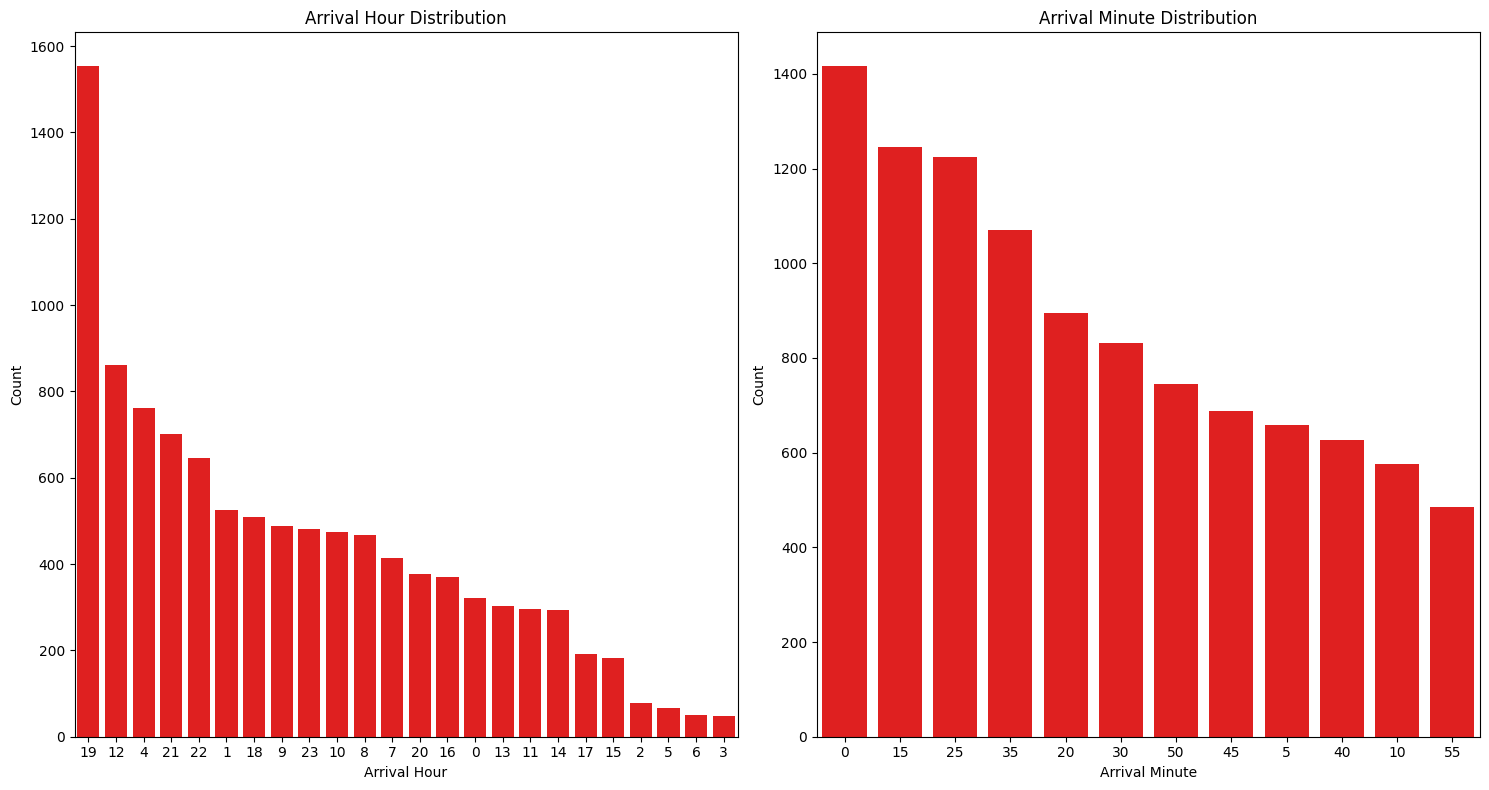

In [ ]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='Arrival_hour', data=df, order=df['Arrival_hour'].value_counts().index, color="red")
plt.xlabel('Arrival Hour')
plt.ylabel('Count')
plt.title('Arrival Hour Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Arrival_minute', data=df, order=df['Arrival_minute'].value_counts().index, color="red")
plt.xlabel('Arrival Minute')
plt.ylabel('Count')
plt.title('Arrival Minute Distribution')

plt.tight_layout()
plt.show()


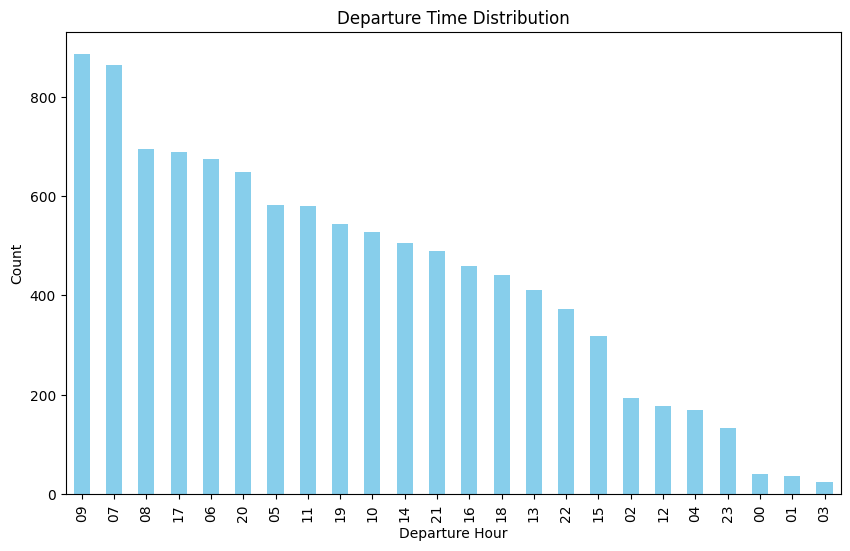

In [ ]:
df['Dep_Time'].str[:2].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Departure Hour')
plt.ylabel('Count')
plt.title('Departure Time Distribution')
plt.show()


In [ ]:
# split Dep_time to hours and minute

df['Dep_hour'] = df['Dep_Time'].str[:2].astype(int)
df['Dep_minute'] = df['Dep_Time'].str[3:].astype(int)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_minute,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,2024-03-22 01:10:00,2h 50m,0,No info,3897,3,24,2,170,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,2024-11-24 13:15:00,7h 25m,2,No info,7662,5,1,7,445,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2024-06-10 04:25:00,19h,2,No info,13882,6,9,19,1140,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,2024-11-24 23:30:00,5h 25m,1,No info,6218,5,12,5,325,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,2024-11-24 21:35:00,4h 45m,1,No info,13302,3,1,4,285,21,35,16,50


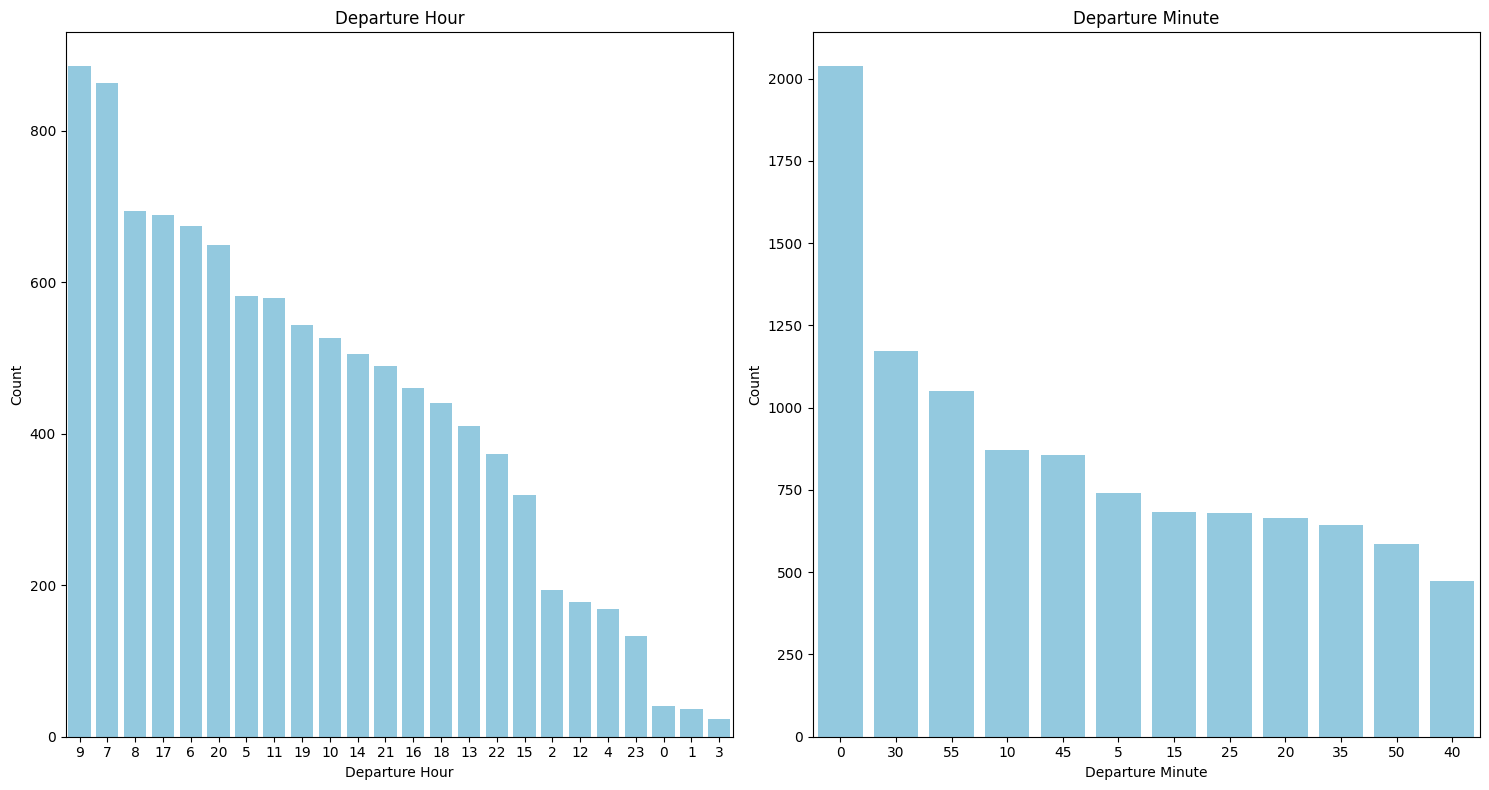

In [ ]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='Dep_hour', data=df, order=df['Dep_hour'].value_counts().index, color='skyblue')
plt.xlabel('Departure Hour')
plt.ylabel('Count')
plt.title('Departure Hour')

plt.subplot(1, 2, 2)
sns.countplot(x='Dep_minute', data=df, order=df['Dep_minute'].value_counts().index, color = 'skyblue')
plt.xlabel('Departure Minute')
plt.ylabel('Count')
plt.title('Departure Minute')

plt.tight_layout()
plt.show()



In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_minute,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,2024-03-22 01:10:00,2h 50m,0,No info,3897,3,24,2,170,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,2024-11-24 13:15:00,7h 25m,2,No info,7662,5,1,7,445,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2024-06-10 04:25:00,19h,2,No info,13882,6,9,19,1140,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,2024-11-24 23:30:00,5h 25m,1,No info,6218,5,12,5,325,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,2024-11-24 21:35:00,4h 45m,1,No info,13302,3,1,4,285,21,35,16,50


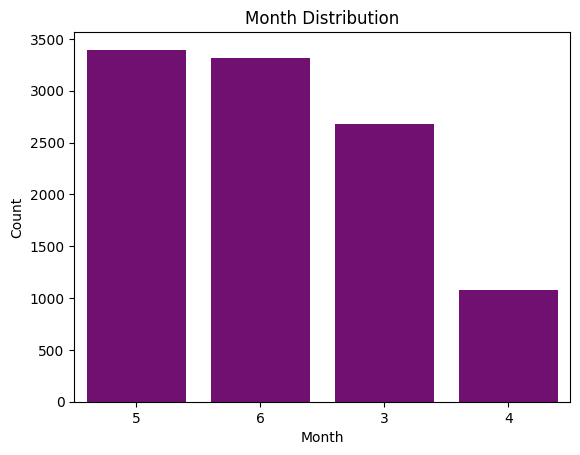

In [ ]:
sns.countplot(x='month', data=df, order=df['month'].value_counts().index, color="purple")
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Distribution')
plt.show()

In [ ]:
palette = sns.color_palette("tab20", n_colors=len(df['Airline'].unique()))

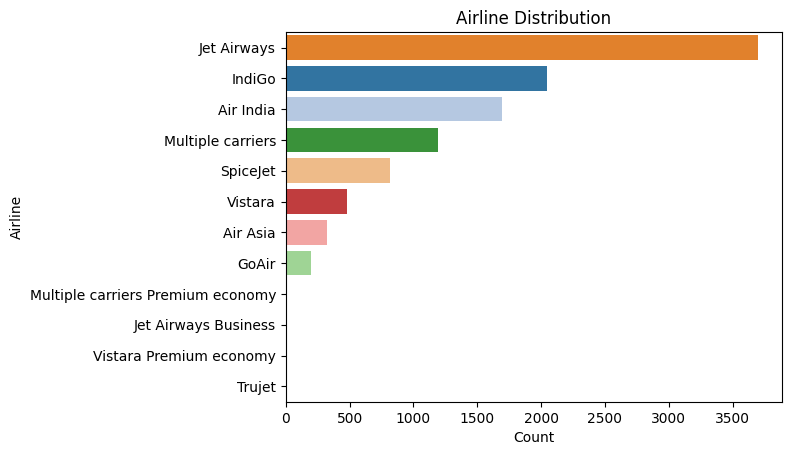

In [ ]:
sns.countplot(data=df, y='Airline', order=df['Airline'].value_counts().index, hue='Airline', palette=palette, legend=False)
plt.xlabel('Count')
plt.ylabel('Airline')
plt.title('Airline Distribution')
plt.show()


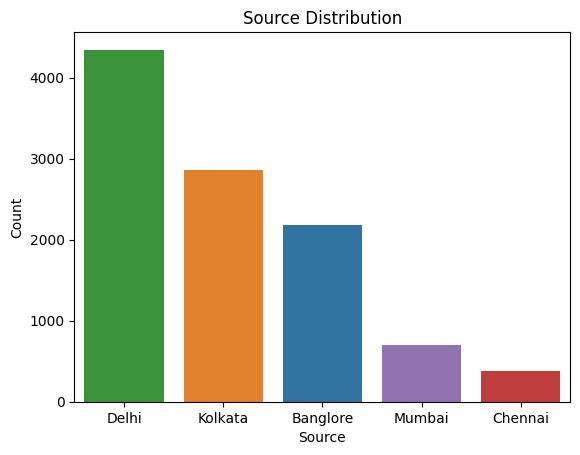

In [ ]:
# Determine the number of unique values in the 'Source' column
unique_sources = df['Source'].nunique()

# Create a palette with the exact number of colors needed
palette = sns.color_palette("tab10", n_colors=unique_sources)

# Plot with the adjusted palette
sns.countplot(x='Source', data=df, order=df['Source'].value_counts().index, hue='Source', palette=palette, legend=False)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Source Distribution')
plt.show()


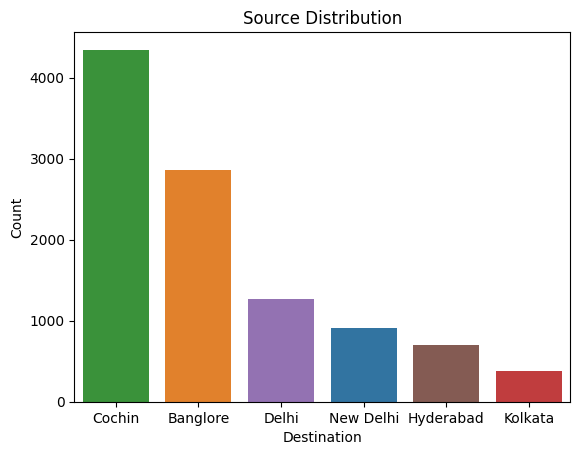

In [ ]:
# Determine the number of unique values in the 'Source' column
unique_Destination = df['Destination'].nunique()

# Create a palette with the exact number of colors needed
palette = sns.color_palette("tab10", n_colors=unique_Destination)

# Plot with the adjusted palette
sns.countplot(x='Destination', data=df, order=df['Destination'].value_counts().index, hue='Destination', palette=palette, legend=False)
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Source Distribution')
plt.show()


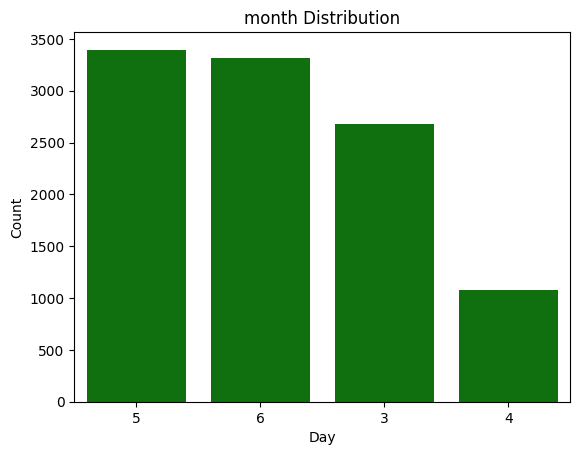

In [ ]:
sns.countplot(x='month', data=df, order=df['month'].value_counts().index, color="green")
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('month Distribution')
plt.show()

In [ ]:
palette = sns.color_palette("tab20", n_colors=len(df['Route'].unique()))

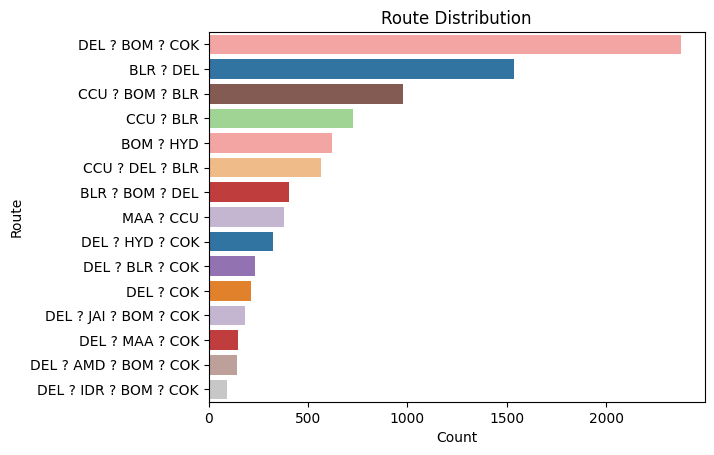

In [ ]:
sns.countplot(data=df, y='Route', order=df['Route'].value_counts()[:15].index, hue='Route', palette=palette, legend=False )
plt.xlabel('Count')
plt.ylabel('Route')
plt.title('Route Distribution')
plt.show()

In [ ]:
df['Len_Route'] = df['Route'].apply(lambda i: len(i.split('→')))

In [ ]:
df['Len_Route']

,Len_Route
0,1
1,1
2,1
3,1
4,1
...,...
10678,1
10679,1
10680,1
10681,1


In [ ]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8181
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [ ]:
df['Additional_Info'].replace({'No Info': 'No info'}, inplace=True)

<ipython-input-57-faea2b9e09f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Additional_Info'].replace({'No Info': 'No info'}, inplace=True)


In [ ]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8184
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
1 Short layover,1
Red-eye flight,1
2 Long layover,1


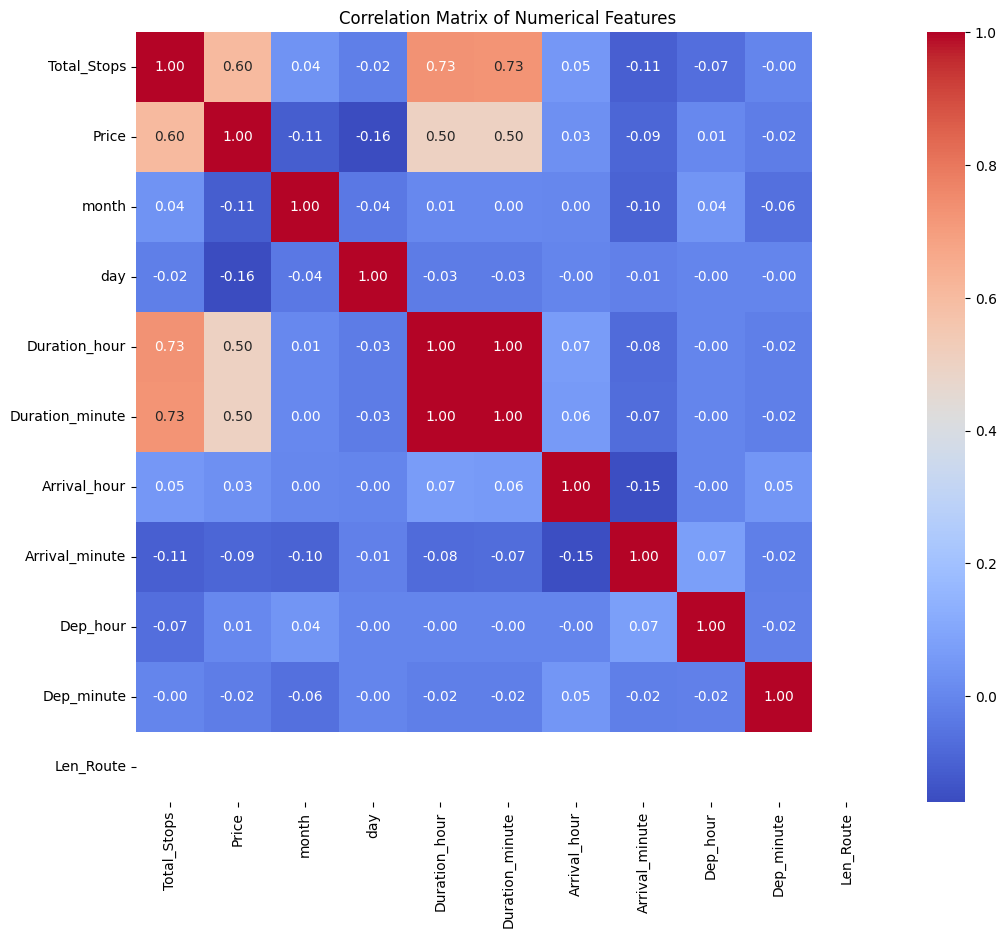

In [ ]:
numerical_features = df.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


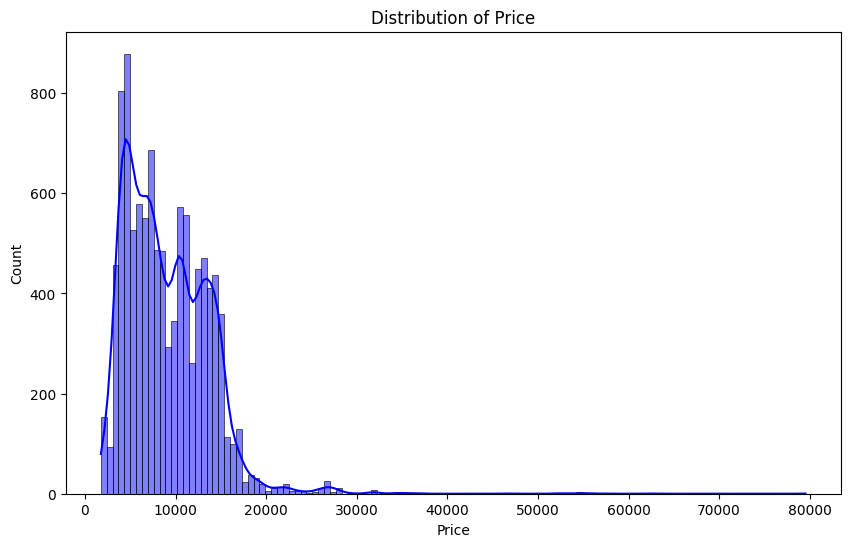

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x ='Price', kde=True, color= 'blue')
plt.title('Distribution of Price')
plt.show()

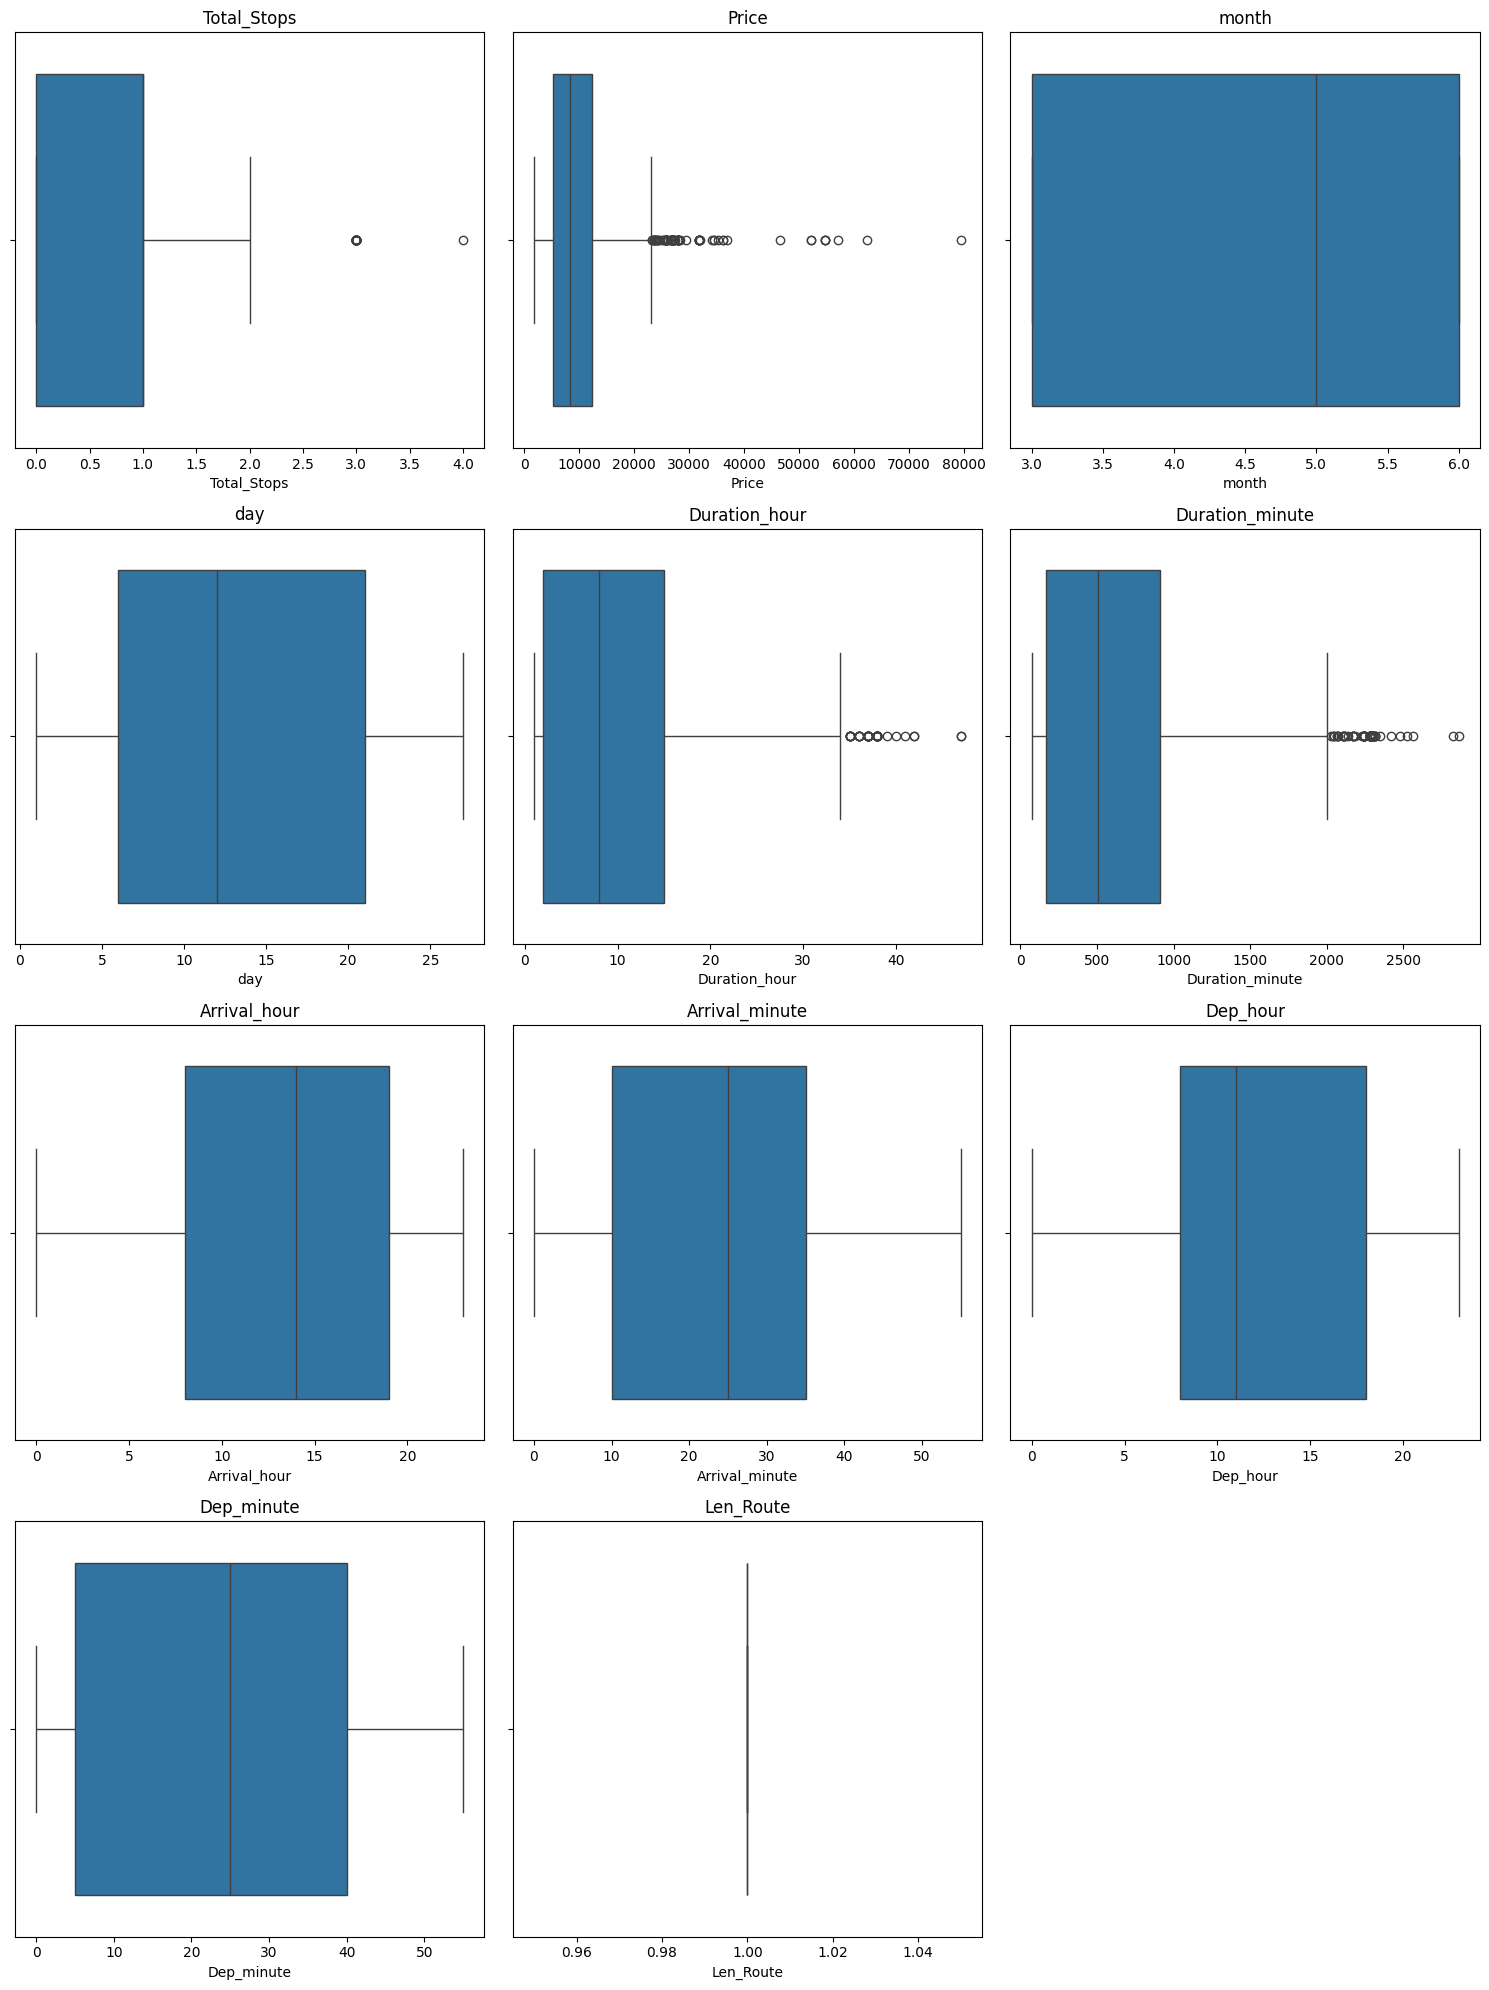

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
numerical_features = df.select_dtypes(include=np.number)
num_cols = len(numerical_features.columns)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size as needed
for i, col in enumerate(numerical_features.columns):
  plt.subplot(num_rows, 3, i + 1)
  sns.boxplot(x=df[col])
  plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers_iqr(data, column):
    """
    Detects outliers in a given column of a DataFrame using the IQR method.

    Args:
        data: Pandas DataFrame containing the data.
        column: Name of the column to check for outliers.

    Returns:
        A list of indices corresponding to outlier values in the specified column.
    """

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data.index[(data[column] < lower_bound) | (data[column] > upper_bound)].tolist()

    return outliers


In [ ]:
# show outliers

numerical_features = df.select_dtypes(include=np.number)
for column in numerical_features.columns:
    outliers = detect_outliers_iqr(df, column)
    if outliers:
        print(f"Outliers in column '{column}': {outliers}")
    else:
        print(f"No outliers found in column '{column}'.")



Outliers in column 'Total_Stops': [402, 919, 1218, 1665, 2172, 2623, 2633, 2718, 2814, 2822, 3157, 3220, 3317, 3496, 3568, 3584, 3815, 3945, 4118, 4463, 4655, 4760, 5050, 5446, 5838, 5947, 5996, 6444, 6599, 7001, 7031, 7249, 7586, 7752, 7876, 8153, 8204, 8601, 8729, 9029, 9182, 9454, 9569, 10639]
Outliers in column 'Price': [123, 396, 486, 510, 597, 628, 657, 785, 826, 936, 946, 959, 975, 1196, 1246, 1341, 1424, 1466, 1478, 1629, 1654, 1785, 1918, 2055, 2099, 2108, 2495, 2556, 2618, 2635, 2693, 2924, 3032, 3111, 3257, 3400, 3535, 3700, 4012, 4521, 4829, 5013, 5136, 5372, 5439, 5662, 5701, 5710, 5719, 5738, 5745, 5856, 5986, 6314, 6407, 6576, 6588, 6605, 6991, 7351, 7356, 7377, 7537, 7554, 7617, 7713, 7724, 7756, 7902, 8020, 8080, 8451, 8470, 8536, 8598, 8940, 8957, 8990, 9019, 9193, 9239, 9632, 9715, 9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10383, 10439, 10511]
No outliers found in column 'month'.
No outliers found in column 'day'.
Outliers in column 'Duration_hour': [226

#**Data Cleaning**

In [ ]:
# drop all outliers

def drop_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [ ]:
numerical_features = df.select_dtypes(include=np.number)
for column in numerical_features.columns:
    df = drop_outliers(df, column)
    print(f"Outliers in column '{column}': {outliers}")
    print(f"No outliers found in column '{column}'.")
    print(df.shape)

Outliers in column 'Total_Stops': []
No outliers found in column 'Total_Stops'.
(10417, 20)
Outliers in column 'Price': []
No outliers found in column 'Price'.
(10321, 20)
Outliers in column 'month': []
No outliers found in column 'month'.
(10321, 20)
Outliers in column 'day': []
No outliers found in column 'day'.
(10321, 20)
Outliers in column 'Duration_hour': []
No outliers found in column 'Duration_hour'.
(10269, 20)
Outliers in column 'Duration_minute': []
No outliers found in column 'Duration_minute'.
(10260, 20)
Outliers in column 'Arrival_hour': []
No outliers found in column 'Arrival_hour'.
(10260, 20)
Outliers in column 'Arrival_minute': []
No outliers found in column 'Arrival_minute'.
(10260, 20)
Outliers in column 'Dep_hour': []
No outliers found in column 'Dep_hour'.
(10260, 20)
Outliers in column 'Dep_minute': []
No outliers found in column 'Dep_minute'.
(10260, 20)
Outliers in column 'Len_Route': []
No outliers found in column 'Len_Route'.
(10260, 20)


In [ ]:
# drop date of journy

df.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
# drop Duration

df.drop('Duration', axis=1, inplace=True)

In [ ]:
# drop Arrival_Time

df.drop('Arrival_Time', axis=1, inplace=True)

In [ ]:
# drop Duration_hour

df.drop('Duration_hour', axis=1, inplace=True)

In [ ]:
# drop dep_time

df.drop('Dep_Time', axis=1, inplace=True)

In [ ]:
# drop route and total stops

df.drop(['Route', 'Total_Stops'], axis=1, inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,month,day,Duration_minute,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Len_Route
0,IndiGo,Banglore,New Delhi,No info,3897,3,24,170,1,10,22,20,1
1,Air India,Kolkata,Banglore,No info,7662,5,1,445,13,15,5,50,1
2,Jet Airways,Delhi,Cochin,No info,13882,6,9,1140,4,25,9,25,1
3,IndiGo,Kolkata,Banglore,No info,6218,5,12,325,23,30,18,5,1
4,IndiGo,Banglore,New Delhi,No info,13302,3,1,285,21,35,16,50,1


In [ ]:
df.shape

(10260, 13)

#**Data Encoding**

In [ ]:
# label encoder all categrorical features

categorical_features = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for feature in categorical_features:
  df[feature] = le.fit_transform(df[feature])

df.head()


,Airline,Source,Destination,Additional_Info,Price,month,day,Duration_minute,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Len_Route
0,3,0,5,4,3897,3,24,170,1,10,22,20,1
1,1,3,0,4,7662,5,1,445,13,15,5,50,1
2,4,2,1,4,13882,6,9,1140,4,25,9,25,1
3,3,3,0,4,6218,5,12,325,23,30,18,5,1
4,3,0,5,4,13302,3,1,285,21,35,16,50,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10260 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10260 non-null  int64
 1   Source           10260 non-null  int64
 2   Destination      10260 non-null  int64
 3   Additional_Info  10260 non-null  int64
 4   Price            10260 non-null  int64
 5   month            10260 non-null  int64
 6   day              10260 non-null  int64
 7   Duration_minute  10260 non-null  int64
 8   Arrival_hour     10260 non-null  int32
 9   Arrival_minute   10260 non-null  int32
 10  Dep_hour         10260 non-null  int64
 11  Dep_minute       10260 non-null  int64
 12  Len_Route        10260 non-null  int64
dtypes: int32(2), int64(11)
memory usage: 1.0 MB


#**Model Training and Testing**

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8208, 12), (2052, 12), (8208,), (2052,))

#**Data Scalling**

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Helpers**

In [ ]:
def pred_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  print('R2 Score for training: ', r2_score(y_train, y_pred_train))
  print('R2 Score for testing: ', r2_score(y_test, y_pred_test))
  print('__________________________________________________')
  print('MAE for training: ', mean_absolute_error(y_train, y_pred_train))
  print('MAE for testing: ', mean_absolute_error(y_test, y_pred_test))
  print('__________________________________________________')
  print('MAPE for training: ', mean_absolute_percentage_error(y_train, y_pred_train))
  print('MAPE for testing: ', mean_absolute_percentage_error(y_test, y_pred_test))
  print('__________________________________________________')
  print('MSE for training: ', mean_squared_error(y_train, y_pred_train))
  print('MSE for testing: ', mean_squared_error(y_test, y_pred_test))
  print('__________________________________________________')
  print('RMSE for training: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
  print('RMSE for testing: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

  return model

# **Models**

#**Linear Regression**

In [ ]:
pipeline = Pipeline([
    ('scaler',RobustScaler()),
    ('regressor', LinearRegression())
])

In [ ]:
param_grid = {
    'regressor__fit_intercept': [True, False]
    }

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)
best_model = grid_search.best_estimator_

Best Parameters: {'regressor__fit_intercept': True}
Best Score: 10500991.127233276


In [ ]:
best_model.set_params(regressor__fit_intercept=True)

Pipeline(steps=[('scaler', RobustScaler()), ('regressor', LinearRegression())])

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [-10676897.62898134 -10473093.9719278  -10183099.57164738
 -10505988.35036538 -10665876.11324447]
Mean Cross-Validation Score: -10500991.127233276


In [ ]:
lr_model = pred_model(LinearRegression(), X_train, y_train, X_test, y_test)

R2 Score for training:  0.36219738763188103
R2 Score for testing:  0.3605136193504188
__________________________________________________
MAE for training:  2575.9464047467864
MAE for testing:  2585.4741059827306
__________________________________________________
MAPE for training:  0.3520429719123582
MAPE for testing:  0.35492052405332186
__________________________________________________
MSE for training:  10481713.109911067
MSE for testing:  10378190.940445455
__________________________________________________
RMSE for training:  3237.5473911451963
RMSE for testing:  3221.5199736219943


#**Polynomial Regression**

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler',  RobustScaler()),
    ('model', LinearRegression())
])

In [ ]:
param_grid = {
    'poly__degree': [2, 3, 4, 5],
    'model__fit_intercept': [True, False]
}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', RobustScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'poly__degree': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best model:", grid_search.best_estimator_)

Best parameters: {'model__fit_intercept': True, 'poly__degree': 2}
Best model: Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', RobustScaler()),
                ('model', LinearRegression())])


In [ ]:
poly_model = grid_search.best_estimator_

In [ ]:
y_pred = poly_model.predict(X_test)

In [ ]:
pred_model(poly_model, X_train, y_train, X_test, y_test)

R2 Score for training:  0.6108002025946841
R2 Score for testing:  0.608746439348254
__________________________________________________
MAE for training:  1961.452585333289
MAE for testing:  1976.7888401220507
__________________________________________________
MAPE for training:  0.2570899782563247
MAPE for testing:  0.26225193009612746
__________________________________________________
MSE for training:  6396149.1215772685
MSE for testing:  6349633.520651957
__________________________________________________
RMSE for training:  2529.060916936812
RMSE for testing:  2519.847916175093


Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', RobustScaler()),
                ('model', LinearRegression())])

#**Ridge Regression**

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('degree', PolynomialFeatures()),
    ('model', Ridge())
])

In [ ]:
param_grid_ridge = {
    'degree__degree': [2, 3, 4, 5],
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__fit_intercept': [True, False]
}

In [ ]:
grid_search_ridge = GridSearchCV(pipeline, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('degree', PolynomialFeatures()),
                                       ('model', Ridge())]),
             param_grid={'degree__degree': [2, 3, 4, 5],
                         'model__alpha': [0.01, 0.1, 1, 10, 100],
                         'model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search_ridge.best_params_)
print("Best model:", grid_search_ridge.best_estimator_)

Best parameters: {'degree__degree': 4, 'model__alpha': 100, 'model__fit_intercept': True}
Best model: Pipeline(steps=[('scaler', RobustScaler()),
                ('degree', PolynomialFeatures(degree=4)),
                ('model', Ridge(alpha=100))])


In [ ]:
y_pred = grid_search_ridge.best_estimator_.predict(X_test)

In [ ]:
pred_model(grid_search_ridge.best_estimator_, X_train, y_train, X_test, y_test)

R2 Score for training:  0.8000857583785761
R2 Score for testing:  0.7481959313399811
__________________________________________________
MAE for training:  1297.0684040140534
MAE for testing:  1438.1144111706312
__________________________________________________
MAPE for training:  0.16359849499365267
MAPE for testing:  0.1836372520040578
__________________________________________________
MSE for training:  3285411.0137319197
MSE for testing:  4086515.027075621
__________________________________________________
RMSE for training:  1812.5702782876915
RMSE for testing:  2021.5130538969124


Pipeline(steps=[('scaler', RobustScaler()),
                ('degree', PolynomialFeatures(degree=4)),
                ('model', Ridge(alpha=100))])

#**Lasso Regression**

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('degree', PolynomialFeatures()),
    ('model', Lasso()),

])

In [ ]:
best_params_lasso = {
    'degree__degree': [2, 3, 4, 5],
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__fit_intercept': [True, False]
}

In [ ]:
grid_search_lasso = GridSearchCV(pipeline, best_params_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+10, tolerance: 1.072e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+10, tolerance: 1.084e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e+10, tolerance: 1.077e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('degree', PolynomialFeatures()),
                                       ('model', Lasso())]),
             param_grid={'degree__degree': [2, 3, 4, 5],
                         'model__alpha': [0.01, 0.1, 1, 10, 100],
                         'model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search_lasso.best_params_)
print("Best model:", grid_search_lasso.best_estimator_)

Best parameters: {'degree__degree': 4, 'model__alpha': 1, 'model__fit_intercept': False}
Best model: Pipeline(steps=[('scaler', RobustScaler()),
                ('degree', PolynomialFeatures(degree=4)),
                ('model', Lasso(alpha=1, fit_intercept=False))])


In [ ]:
y_pred = grid_search_lasso.best_estimator_.predict(X_test)

In [ ]:
pred_model(grid_search_lasso.best_estimator_, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.271e+10, tolerance: 7.704e+07
  model = cd_fast.enet_coordinate_descent(


R2 Score for training:  0.8356615531499056
R2 Score for testing:  0.7859163895700343
__________________________________________________
MAE for training:  1149.2663049542318
MAE for testing:  1309.7026100543019
__________________________________________________
MAPE for training:  0.14425250414667065
MAPE for testing:  0.16689772383142115
__________________________________________________
MSE for training:  2700754.7780579766
MSE for testing:  3474351.6883115647
__________________________________________________
RMSE for training:  1643.397328115747
RMSE for testing:  1863.9612893811836


Pipeline(steps=[('scaler', RobustScaler()),
                ('degree', PolynomialFeatures(degree=4)),
                ('model', Lasso(alpha=1, fit_intercept=False))])

#**Decision Tree Regressor**

In [ ]:
# Define the Decision Tree Regressor

dt_regressor = DecisionTreeRegressor()

In [ ]:
# Define the hyperparameter grid to search over

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create a GridSearchCV object

grid_search_dt = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search

grid_search_dt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search_dt.best_params_)
print("Best model:", grid_search_dt.best_estimator_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best model: DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10)


In [ ]:
y_pred = grid_search_dt.best_estimator_.predict(X_test)

In [ ]:
pred_model(grid_search_dt.best_estimator_, X_train, y_train, X_test, y_test)

R2 Score for training:  0.9507326153387579
R2 Score for testing:  0.8714311177660874
__________________________________________________
MAE for training:  478.27107766465366
MAE for testing:  747.97786818926
__________________________________________________
MAPE for training:  0.05776879360404799
MAPE for testing:  0.09063446952625609
__________________________________________________
MSE for training:  809665.2188008289
MSE for testing:  2086537.6483355511
__________________________________________________
RMSE for training:  899.813991223091
RMSE for testing:  1444.4852537618897


DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10)

# **Random forest Regressor**

In [ ]:
# Define the Random forest

rf_regressor = RandomForestRegressor()

In [ ]:
# Define the hyperparameter grid to search over

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create a GridSearchCV object

grid_search_rf = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search

grid_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search_rf.best_params_)
print("Best model:", grid_search_rf.best_estimator_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best model: RandomForestRegressor(max_depth=15, n_estimators=300)


In [ ]:
y_pred = grid_search_rf.best_estimator_.predict(X_test)

In [ ]:
pred_model(grid_search_rf.best_estimator_, X_train, y_train, X_test, y_test)

R2 Score for training:  0.9795046226222833
R2 Score for testing:  0.9079162452585089
__________________________________________________
MAE for training:  319.65948913309654
MAE for testing:  650.994987001023
__________________________________________________
MAPE for training:  0.03888400359349313
MAPE for testing:  0.07972544627479883
__________________________________________________
MSE for training:  336823.1198598421
MSE for testing:  1494422.4273386325
__________________________________________________
RMSE for training:  580.36464387473
RMSE for testing:  1222.4657162221902


RandomForestRegressor(max_depth=15, n_estimators=300)

#**XGBoost Regressor**

In [ ]:
# Define the XGBoost

xgb_regressor = XGBRegressor()

In [ ]:
# Define the hyperparameter grid to search over

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [ ]:
# Create a GridSearchCV object

grid_search_xgb = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search

grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search_xgb.best_params_)
print("Best model:", grid_search_xgb.best_estimator_)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
Best model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
y_pred = grid_search_xgb.best_estimator_.predict(X_test)

In [ ]:
pred_model(grid_search_xgb.best_estimator_, X_train, y_train, X_test, y_test)

R2 Score for training:  0.969912588596344
R2 Score for testing:  0.9208752512931824
__________________________________________________
MAE for training:  465.92907540840014
MAE for testing:  691.980236209624
__________________________________________________
MAPE for training:  0.05823844476913949
MAPE for testing:  0.08542727047337004
__________________________________________________
MSE for training:  494459.4936274902
MSE for testing:  1284111.1618630597
__________________________________________________
RMSE for training:  703.1781379049623
RMSE for testing:  1133.1862873610232


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#**K-nn Regressor**   

In [ ]:
# Define KNN regressor

knn_regressor = KNeighborsRegressor()

In [ ]:
# Define the hyperparameter grid to search over

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [ ]:
# Create a GridSearchCV object

grid_search_knn = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search

grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search_knn.best_params_)
print("Best model:", grid_search_knn.best_estimator_)

Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best model: KNeighborsRegressor(p=1, weights='distance')


In [ ]:
y_pred = grid_search_knn.best_estimator_.predict(X_test)

In [ ]:
pred_model(grid_search_knn.best_estimator_, X_train, y_train, X_test, y_test)

R2 Score for training:  0.9939046616400428
R2 Score for testing:  0.8505448029674458
__________________________________________________
MAE for training:  44.75641650422352
MAE for testing:  886.9796012614728
__________________________________________________
MAPE for training:  0.005031656907454962
MAPE for testing:  0.10775681129289745
__________________________________________________
MSE for training:  100171.41159031838
MSE for testing:  2425500.5560402777
__________________________________________________
RMSE for training:  316.4986754953619
RMSE for testing:  1557.4018608054498


KNeighborsRegressor(p=1, weights='distance')

#**SVM Regressor**

In [ ]:
# Define SVM Regressor

svm_regressor = SVR()

In [ ]:
# Define the hyperparameter grid to search over

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

In [ ]:
# create a GridSearchCV object

grid_search_svm = GridSearchCV(svm_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search

grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search_svm.best_params_)
print("Best model:", grid_search_svm.best_estimator_)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best model: SVR(C=10, kernel='linear')


In [ ]:
y_pred = grid_search_svm.best_estimator_.predict(X_test)

In [ ]:
pred_model(grid_search_svm.best_estimator_, X_train, y_train, X_test, y_test)

R2 Score for training:  0.31316673533311634
R2 Score for testing:  0.31420359500351425
__________________________________________________
MAE for training:  2480.364899984571
MAE for testing:  2479.0062011496143
__________________________________________________
MAPE for training:  0.29324162802601034
MAPE for testing:  0.2947792213276911
__________________________________________________
MSE for training:  11287487.84494905
MSE for testing:  11129753.897330718
__________________________________________________
RMSE for training:  3359.685676510386
RMSE for testing:  3336.128579256309


SVR(C=10, kernel='linear')

#**Conclusion**

#**Models Evalouation**

# Linear & Polynomial Regression

|Evaluation|Linear Regression|Polynomial Regression|     
|-------|-------|-------|
|R2 Score for training|0.36|0.61|
|R2 Score for testing|0.36|0.60|       
|MAE for training|2575.9|1961.4|    
|MAE for testing|2585.4|1976.7|     
|MAPE for training|35.20%|25.71%|
|MAPE for testing|35.49%|26.23%|   
|MSE for training|10481713.1|6396149.1|
|MSE for testing|10378190.9|6349633.5|
|RMSE for training|3237.5|2529.0|
|RMSE for testing|3221.5|2519.8|

____________________________________________________
#Ridge & Lasso Regression  

|Evaluation|Ridge Regression|Lasso Regression|
|-------|-------|-------|
|R2 Score for training|0.80|0.83|
|R2 Score for testing|0.74|0.78|         
|MAE for training|1297.0|1149.2|        
|MAE for testing|1438.1|1309.7|       
|MAPE for training|16.36%|14.43%|  
|MAPE for testing|18.36%|16.69%|         
|MSE for training|3285411.0|2700754.7|
|MSE for testing|4086515.0|3474351.6|
|RMSE for training|1812.5|1643.3|  
|RMSE for testing|2021.5|1863.9|  

________________________________________________________________________________
#Decision Tree & Random Forest

|Evaluation|Decision Tree|Random Forest|
|-------|-------|-------|
|R2 Score for training|0.95|0.97|
|R2 Score for testing|0.87|0.90|         
|MAE for training|478.2|319.6|        
|MAE for testing|747.9|650.9|       
|MAPE for training|5.78%|3.89%|  
|MAPE for testing|9.06%|7.97%|         
|MSE for training|809665.2|336823.1|
|MSE for testing|2086537.6|1494422.4|
|RMSE for training|899.8|580.3|  
|RMSE for testing|1444.4|1222.4|  

___________________________________________________________________
# K-nn Regressor & SVM Regressor
|Evaluation|KNN|SVM|
|-------|-------|-------|
|R2 Score for training|0.99|0.31|
|R2 Score for testing|0.85|0.31|         
|MAE for training|44.7|2480.3|        
|MAE for testing|886.9|2479.0|       
|MAPE for training|0.05%|29.32%|  
|MAPE for testing|10.78%|29.48%|         
|MSE for training|100171.4|11287487.8|
|MSE for testing|2425500.5|11129753.8|
|RMSE for training|316.4|3359.6|  
|RMSE for testing|1557.4|3336.1|  

______________________________________________________________________
# XG-Boost
|Evaluation|XG-Boost|
|-------|-------|
|R2 Score for training|0.96|
|R2 Score for testing|0.92|         
|MAE for training|465.9|        
|MAE for testing|691.9|       
|MAPE for training|5.82%|  
|MAPE for testing|8.54%|         
|MSE for training|494459.4|
|MSE for testing|1284111.1|
|RMSE for training|703.1|  
|RMSE for testing|1133.1|  



#**Summary of results for models**

## ▪ Linear Regression & SVM :
Demonstrated relatively low performance, with low R2-Score values ​​and high error metrics, This suggests that these models might not be the best fit for this task.
______________________________________________________________
## ▪ Polynomial Regression & Ridge Regression :
showed noticeable improvements in performance, with higher R2-Score values and lower error metrics compared to Linear Regression, This reflects these models better adaptability to the data.
___________________________________________________________________
## ▪ Lasso Regression :
demonstrated good performance with high R2-Score values and low error metrics, indicating its capability to reduce complexity and overcome overfitting.
____________________________________________________________________
## ▪ Decision Tree & Random Forest :  
showed excellent performance, with very high R2-Score values and low error metrics, reflecting their ability to generalize well without overfitting the training data.
______________________________________________________________________
## ▪ XG-Boost :
exhibited outstanding performance, with high R2-Score values and low error metrics, making it a strong and effective model for data analysis.
____________________________________________________________________________
## ▪ KNN :
also demonstrated excellent performance, with very high R2-Score values and low error metrics, making it highly suitable.

_______________________________________________________________________
#**In conclusion**:
#### Random Forest and XG-Boost, models proved to be the most effective and accurate, making them preferred choices for practical applications.